# Q3. How does the number of people flying between different locations change over time? 

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Opening the datasets with necessary columns

In [2]:
dataset_2006 = pd.read_csv("2006.csv", usecols = ['Month','FlightNum','Origin'])
dataset_2007 = pd.read_csv("2007.csv", usecols = ['Month','FlightNum','Origin'])

Checking for null vallues

In [3]:
pd.isnull(dataset_2006).sum(axis = 0)

Month        0
FlightNum    0
Origin       0
dtype: int64

In [4]:
pd.isnull(dataset_2007).sum(axis = 0)

Month        0
FlightNum    0
Origin       0
dtype: int64

Grouping the flight count of each year by month

In [5]:
volume_inyear06 = dataset_2006.groupby(('Month')).FlightNum.count()
volume_inyear07 = dataset_2007.groupby(('Month')).FlightNum.count()

Renaming the index names since dataset is coded -> Month 1 (January) - 7 (December)

In [6]:
volume_inyear06.rename({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}, inplace = True)
volume_inyear07.rename({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}, inplace = True)

Plotting flight counts by month for both years

<AxesSubplot:xlabel='Month', ylabel='Number of Flights'>

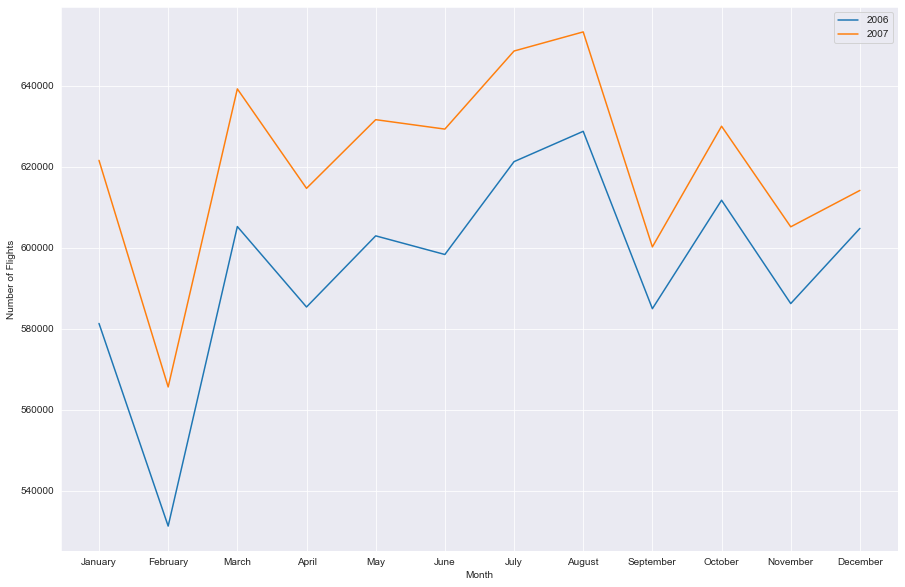

In [7]:
#setting the darker grid style
sns.set_style("darkgrid")

#setting the size of the figure
fig,ax = plt.subplots(figsize = (15, 10))

#setting the label for the y axis
ax.set(xlabel = "Month", ylabel = "Number of Flights")

sns.lineplot(ax=ax, x = volume_inyear06.index, y = volume_inyear06.values, label = "2006")
sns.lineplot(ax=ax, x = volume_inyear07.index, y = volume_inyear07.values, label = "2007")

Grouping the flight count for each airport among the two years

In [8]:
volume_byorigin06 = dataset_2006.groupby(('Origin')).FlightNum.count()
volume_byorigin07 = dataset_2007.groupby(('Origin')).FlightNum.count()

In [9]:
volume_byorigin06

Origin
ABE     5188
ABI     2845
ABQ    37264
ABY     1369
ACK      235
       ...  
WRG      726
WYS      264
XNA    11429
YAK      726
YUM     3349
Name: FlightNum, Length: 289, dtype: int64

In [10]:
volume_byorigin07

Origin
ABE     5701
ABI     2836
ABQ    41161
ABY     1312
ACK      314
       ...  
WYS      266
XNA    14025
YAK      726
YKM      410
YUM     3524
Name: FlightNum, Length: 304, dtype: int64

Turning series into dataframes and resetting the index to get origin as a column to merge

In [11]:
volume_byorigin06 = volume_byorigin06.to_frame()
volume_byorigin06.reset_index()

volume_byorigin07 = volume_byorigin07.to_frame()
volume_byorigin07.reset_index()

,Origin,FlightNum
0,ABE,5701
1,ABI,2836
2,ABQ,41161
3,ABY,1312
4,ACK,314
...,...,...
299,WYS,266
300,XNA,14025
301,YAK,726
302,YKM,410


Merging the two dataframes on Origin

In [12]:
test = pd.merge(volume_byorigin06, volume_byorigin07,  

 on='Origin',  

 how='inner',
                
 suffixes=('_2006', '_2007'))

In [13]:
test

,FlightNum_2006,FlightNum_2007
Origin,,
ABE,5188,5701
ABI,2845,2836
ABQ,37264,41161
ABY,1369,1312
ACK,235,314
...,...,...
WRG,726,726
WYS,264,266
XNA,11429,14025


Employing a test to see whether there has been an increase over the years, where a 1 shows an increase

In [14]:
def check(row):  
    if row['FlightNum_2007'] > row['FlightNum_2006']:
        return '1'
    else:
        return '0'
    
test['2007>2006'] = test.apply(lambda row: check(row), axis=1)

In [15]:
test

,FlightNum_2006,FlightNum_2007,2007>2006
Origin,,,
ABE,5188,5701,1
ABI,2845,2836,0
ABQ,37264,41161,1
ABY,1369,1312,0
ACK,235,314,1
...,...,...,...
WRG,726,726,0
WYS,264,266,1
XNA,11429,14025,1


In [16]:
test['2007>2006'].value_counts()

1    185
0    100
Name: 2007>2006, dtype: int64

In [17]:
(185/285) * 100

64.91228070175438

Almost to 65% of airports have had an icrease in flights i.e. increase in passengers from 2006 to 2007